In [1]:

import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen,Request
url = "https://www.x-rates.com/table/?from=INR&amount=1"

In [2]:
request = Request(url)
response = urlopen(request)
html = response.read()
html_soup = BeautifulSoup(html , 'html.parser')
   

In [3]:
#Creating DataFrame uing WebData
INR=[]
IINR=[]
Currency=[]
Rates=html_soup.find_all('td')
count=30
len1=len(Rates)//3
for rate in range(0,len1-10):
    con_=Rates[count].text.strip()
    #print(con_)
    Currency.append(con_)
    
    '''if len(con_)==3:
        Country.append(con_[0]+con_[1])
        Currency.append(con_[2])
    elif len(con_)==2:
        Country.append(con_[0])
        Currency.append(con_[1])
    else:
        Country.append(con_[0])
        Currency.append(con_[0])'''
    
    count+=1
    INR_=Rates[count].text
    INR.append(INR_)
    count+=1
    IINR_=Rates[count].text
    count=count+1
    IINR.append(IINR_)
Rupee=pd.DataFrame({'CurrencyName':Currency,'1.00 INR':INR,'inv 1 INR':IINR})
#print(Rupee)
    


In [4]:
print(Rupee.head())

        CurrencyName  1.00 INR   inv 1 INR
0     Argentine Peso  0.832648    1.200988
1  Australian Dollar  0.020532   48.703934
2     Bahraini Dinar  0.005240  190.842137
3      Botswana Pula  0.151472    6.601895
4     Brazilian Real  0.058435   17.112907


In [5]:
RUP=pd.DataFrame({'CurrencyName':Rupee['CurrencyName'],'1.00 INR':Rupee['1.00 INR']})
RUP['1.00 INR']=RUP['1.00 INR'].astype(float)

RUP.sort_values(by='1.00 INR',inplace=True,ascending=False)
RUP=RUP.head(25)
IRUP=pd.DataFrame({'CurrencyName':Rupee['CurrencyName'],'inv 1 INR':Rupee['inv 1 INR']})
IRUP['inv 1 INR']=IRUP['inv 1 INR'].astype(float)

IRUP.sort_values(by='inv 1 INR',inplace=True,ascending=False)
IRUP=IRUP.head(25)


In [6]:
#Top 10 countries where rupee value is more
print(RUP.head(10))

         CurrencyName    1.00 INR
19       Iranian Rial  589.123680
18  Indonesian Rupiah  196.487397
10     Colombian Peso   47.644348
23   South Korean Won   16.410737
8        Chilean Peso   11.157244
22  Kazakhstani Tenge    5.389505
16   Hungarian Forint    4.214878
42   Sri Lankan Rupee    2.508822
33    Pakistani Rupee    2.164080
17    Icelandic Krona    1.717027


In [7]:
#Top 10 countries where rupee value is less
print(IRUP.head(10))

        CurrencyName   inv 1 INR
24     Kuwaiti Dinar  236.263138
2     Bahraini Dinar  190.842137
32        Omani Rial  186.623260
50     British Pound   92.658706
14              Euro   79.382435
44       Swiss Franc   72.224185
51         US Dollar   71.756644
7    Canadian Dollar   54.019087
5    Bruneian Dollar   52.664590
40  Singapore Dollar   52.664590


In [8]:
import matplotlib.pyplot as plt

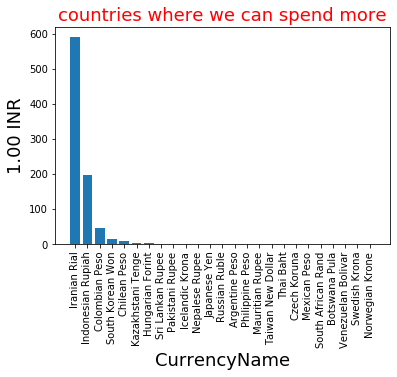

In [9]:
x=RUP['CurrencyName']
y=RUP['1.00 INR']
plt.bar(x, y)
plt.title('countries where we can spend more',fontsize=18,color='red')
plt.xlabel('CurrencyName',fontsize=18)
plt.ylabel('1.00 INR',fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

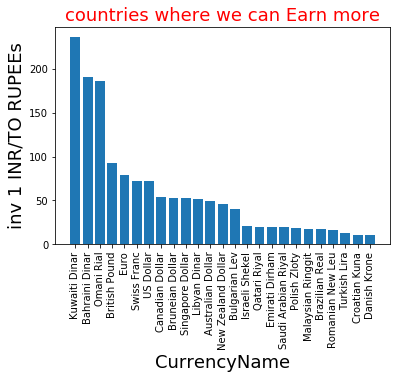

In [10]:
x=IRUP['CurrencyName']
y=IRUP['inv 1 INR']
plt.bar(x, y)
plt.title('countries where we can Earn more',fontsize=18,color='red')
plt.xlabel('CurrencyName',fontsize=18)
plt.ylabel('inv 1 INR/TO RUPEEs',fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

In [11]:
Rupee.to_csv('CURRENCY_ExchangeRates.csv')

In [12]:
CCL=pd.read_csv("CountriesCurrencyList.csv")

In [13]:
print(CCL.head(5))

   Unnamed: 0         Country    CurrencyName CurrencyCode
0           0     Afghanistan         Afghani          AFN
1           1   Åland Islands            Euro          EUR
2           2         Albania             Lek          ALL
3           3         Algeria  Algerian Dinar          DZD
4           4  American Samoa       US Dollar          USD


In [14]:
CER=pd.read_csv("CURRENCY_ExchangeRates.csv")

In [15]:
print(CER.head(5))

   Unnamed: 0       CurrencyName  1.00 INR   inv 1 INR
0           0     Argentine Peso  0.832648    1.200988
1           1  Australian Dollar  0.020532   48.703934
2           2     Bahraini Dinar  0.005240  190.842137
3           3      Botswana Pula  0.151472    6.601895
4           4     Brazilian Real  0.058435   17.112907


In [16]:
l1=len(CCL)
l2=len(CER)

In [17]:
CER['Country']="NA"
CER['CurrencyCode']="NA"

In [18]:
for i in range(0,l2):
    for j in range(0,l1):
        a=CER['CurrencyName'][i]
        c=CCL['CurrencyName'][j]
        x=CCL['Country'][j]
        y=c[0:5]
        z=a[0:5]
        x1=x[0:5]
        
        if(a==CCL['CurrencyName'][j] or y==z or x1==z):
            CER.loc[i,'CurrencyCode']=CCL['CurrencyCode'][j]
            CER.loc[i,'Country']=CCL['Country'][j]
            break
        else:
            
            b=a.split(" ")
            e=c.split(" ")
            y=c[0:5]
            z=a[0:5]
            if len(b)==2:
                
                if(b[0]==CCL['CurrencyName'][j] or b[1]==CCL['CurrencyName'][j]):
                    CER.loc[i,'CurrencyCode']=CCL['CurrencyCode'][j]
                    CER.loc[i,'Country']=CCL['Country'][j]
            if len(b)==3:
                d=b[1]+" "+b[0]+" "+b[2]
                g=b[1]+" "+b[2]
                
                
                if(b[0]==c or b[1]==c or b[2]==c or d==c or c==g):
                    CER.loc[i,'CurrencyCode']=CCL['CurrencyCode'][j]
                    CER.loc[i,'Country']=CCL['Country'][j]
            if len(e)==3:
                g=e[1]+" "+e[2]
                if(e[0]==a or e[1]==a or e[2]==a or g==a):
                    CER.loc[i,'CurrencyCode']=CCL['CurrencyCode'][j]
                    CER.loc[i,'Country']=CCL['Country'][j]
                
            
                
            

In [19]:
print(CER.head(5))

   Unnamed: 0       CurrencyName  1.00 INR   inv 1 INR    Country CurrencyCode
0           0     Argentine Peso  0.832648    1.200988  Argentina          ARS
1           1  Australian Dollar  0.020532   48.703934  Australia          AUD
2           2     Bahraini Dinar  0.005240  190.842137    Bahrain          BHD
3           3      Botswana Pula  0.151472    6.601895   Botswana          BWP
4           4     Brazilian Real  0.058435   17.112907     Brazil          BRL


In [21]:
CER.to_csv("newCurrencyExchangeList.csv")